# Статистический анализ и машинное обучение

В этом ноутбуке рассмотрены базовые примеры фиттинга статистических моделей (statsmodels, scipy) и моделей машинного обучения (scikit-learn)

Используемые библиотеки имеют интерфейс обучения через метод .fit(), поэтому опыт использования одних моделей легко переносится на другие

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

np.random.seed(42)

## Линейная регрессия методом Ordinary Least Squares (OLS)

In [11]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x == 2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [12]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [13]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.227
Date:                Fri, 29 Sep 2023   Prob (F-statistic):             0.0755
Time:                        13:43:02   Log-Likelihood:                -149.08
No. Observations:                 100   AIC:                             302.2
Df Residuals:                      98   BIC:                             307.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2305      0.215      5.711      0.0

/Users/arinasapogova/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


## Линейная регрессия при нелинейных данных

In [17]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     216.3
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           4.04e-27
Time:                        14:44:14   Log-Likelihood:                -34.427
No. Observations:                  50   AIC:                             76.85
Df Residuals:                      46   BIC:                             84.50
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4842      0.026     18.339      0.0

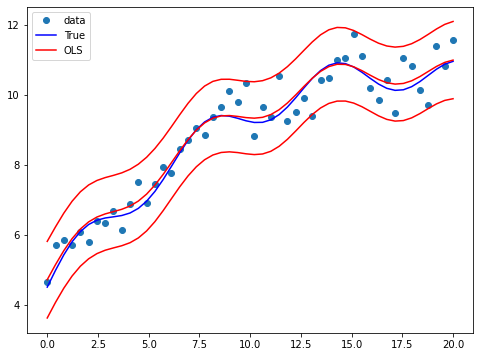

In [20]:
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=[8, 6])

ax.plot(x, y, "o", label="data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(x, res.fittedvalues, "r-", label="OLS")
ax.plot(x, iv_u, "r-")
ax.plot(x, iv_l, "r-")
ax.legend(loc="best")

## Статистические тесты при проверке гипотез с помощью SciPy

#### Тест Манна-Уитни / Mann–Whitney U test

In [21]:
import scipy.stats as st

males = [19, 22, 16, 29, 24]
females = [20, 11, 17, 12]

st.mannwhitneyu(males, females, method="exact")

MannwhitneyuResult(statistic=17.0, pvalue=0.1111111111111111)

#### Т-тест / Student's t-test

In [22]:
rng = np.random.default_rng()
#The method rvs() of Python Scipy of object norm is random variates that generate random numbers.
rvs1 = st.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = st.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
st.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=-1.1589353886793452, pvalue=0.2467597469796404)

In [24]:
rvs3 = st.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
st.ttest_ind(rvs1, rvs3, equal_var=False)

Ttest_indResult(statistic=-1.2964104359462576, pvalue=0.19513482533797588)

In [23]:
rvs4 = st.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
st.ttest_ind(rvs1, rvs4)

Ttest_indResult(statistic=-0.3431156510212354, pvalue=0.731583717947996)

## Машинное обучение с помощью scikit-learn

In [25]:
!pip3 install -U scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a2/6b/d96b05c50d84f8ab330f6615b021c9d348f1d783b9291cfc5500ada9de88/scikit_learn-1.3.1-cp39-cp39-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 5.3 MB/s eta 0:00:0000:010:010m
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

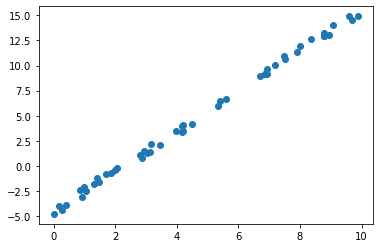

In [28]:
rng = np.random.RandomState(1)
x = 10 * rng.random(50)
y = 2 * x - 5 + rng.random(50)
plt.scatter(x, y);

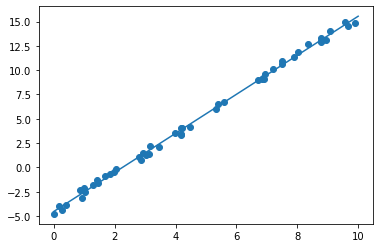

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:,np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [30]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.00823024322775
Model intercept: -4.5336529720991265


Classification example

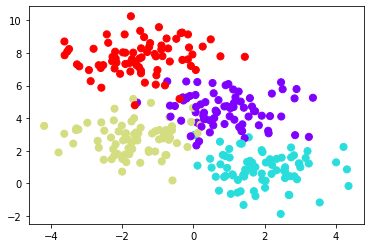

In [38]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                 random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [44]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:,0], X[:,1], c=y, s=30, cmap=cmap,
              clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

/var/folders/vq/c3gzvjbj63d2jq1b90q56bch0000gn/T/ipykernel_13759/1884739387.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


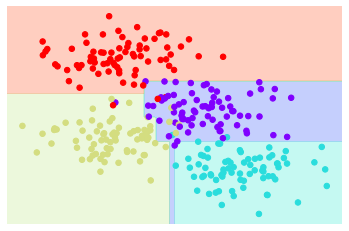

In [45]:
visualize_classifier(DecisionTreeClassifier(max_depth=5), X, y)